In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
aisles= pd.read_csv('aisles.csv')
departments=pd.read_csv('departments.csv')
order_products_prior=pd.read_csv('order_products__prior.csv')
order_products_train=pd.read_csv('order_products__train.csv')
orders=pd.read_csv('orders.csv')
products=pd.read_csv('products.csv')

In [3]:
aisles.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
departments.head()


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
order_products_prior.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
order_products_train.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
len(orders)


3421083

In [10]:
#checking for missing values
total=orders.isnull().sum()
total


order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [11]:
#checking for the percentage
percentage=total/orders.isnull().count()
percentage

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060276
dtype: float64

In [12]:
missing_value_table_orders = pd.concat([total,percentage],keys=['Total','Percentage'],axis=1)
missing_value_table_orders

,Total,Percentage
order_id,0,0.000000
user_id,0,0.000000
eval_set,0,0.000000
order_number,0,0.000000
order_dow,0,0.000000
order_hour_of_day,0,0.000000
days_since_prior_order,206209,0.060276


In [13]:
orders_new=orders[orders['days_since_prior_order'].notnull()]
orders_new.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0


In [14]:
#aisles
total_a=aisles.isnull().count()
total_a

aisle_id    134
aisle       134
dtype: int64

In [15]:
percentage_a=total_a/aisles.isnull().count()
percentage_a

aisle_id    1.0
aisle       1.0
dtype: float64

In [16]:
missing_value_table_aisles = pd.concat([total_a,percentage_a],keys=['Total','Percentage'],axis=1)
missing_value_table_aisles

,Total,Percentage
aisle_id,134,1.0
aisle,134,1.0


In [17]:
#departments
total_d=departments.isnull().sum()
total_d

department_id    0
department       0
dtype: int64

In [18]:
percentage_d=total_d/departments.isnull().count()
percentage_d

department_id    0.0
department       0.0
dtype: float64

In [19]:
missing_value_table_departments = pd.concat([total_d,percentage_d],keys=['Total','Percentage'],axis=1)
missing_value_table_departments

,Total,Percentage
department_id,0,0.0
department,0,0.0


In [20]:
#orders_prior
total_order_p_p=order_products_prior.isnull().sum()
total_order_p_p

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [21]:
percentage_order_p_p=total_order_p_p/order_products_prior.isnull().count()
percentage_order_p_p

order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

In [22]:
missing_value_table_order_p_p = pd.concat([total_order_p_p,percentage_order_p_p],keys=['Total','Percentage'],axis=1)
missing_value_table_order_p_p

,Total,Percentage
order_id,0,0.0
product_id,0,0.0
add_to_cart_order,0,0.0
reordered,0,0.0


In [23]:
#order_train
total_order_train=order_products_train.isnull().sum()
total_order_train

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [24]:
percentage_order_train=total_order_train/order_products_train.isnull().count()
percentage_order_train

order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

In [25]:
missing_value_table_order_train = pd.concat([total_order_train,percentage_order_train],keys=['Total','Percentage'],axis=1)
missing_value_table_order_train

,Total,Percentage
order_id,0,0.0
product_id,0,0.0
add_to_cart_order,0,0.0
reordered,0,0.0


In [26]:
#products
total_products=products.isnull().sum()
total_products

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [27]:
percentage_products=total_products/products.isnull().count()
percentage_products

product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64

In [28]:
missing_value_table_products = pd.concat([total_products,percentage_products],keys=['Total','Percentage'],axis=1)
missing_value_table_products

,Total,Percentage
product_id,0,0.0
product_name,0,0.0
aisle_id,0,0.0
department_id,0,0.0


In [29]:
count=orders['eval_set'].value_counts()
count

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

/Users/poojavaishnavipenmetsa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Eval_set breakdown in orders dataset')

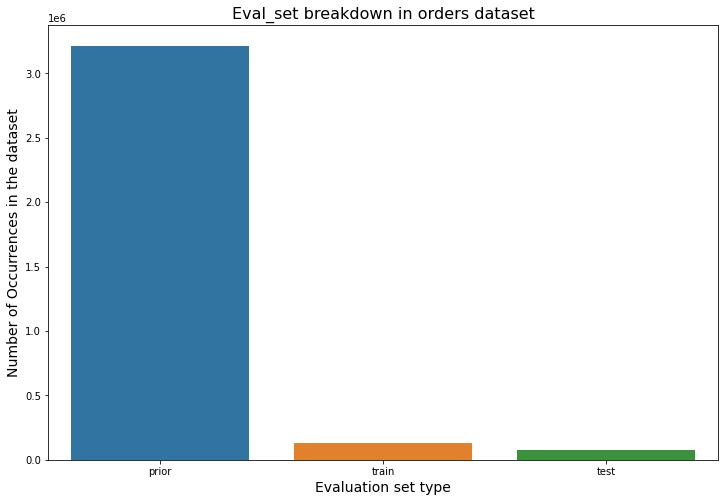

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Number of Occurrences in the dataset', fontsize=14)
plt.xlabel('Evaluation set type', fontsize=14)
plt.title('Eval_set breakdown in orders dataset', fontsize=16)

In [31]:
count_hour_of_day=orders['order_hour_of_day'].value_counts()
count_hour_of_day

10    288418
11    284728
15    283639
14    283042
13    277999
12    272841
16    272553
9     257812
17    228795
18    182912
8     178201
19    140569
20    104292
7      91868
21     78109
22     61468
23     40043
6      30529
0      22758
1      12398
5       9569
2       7539
4       5527
3       5474
Name: order_hour_of_day, dtype: int64

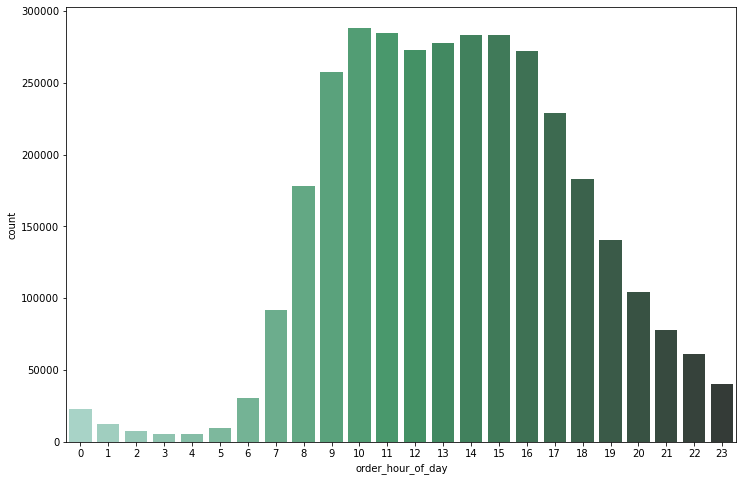

In [32]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_hour_of_day", data=orders,palette='BuGn_d')


In [33]:
count_dow=orders['order_dow'].value_counts()
count_dow

0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: order_dow, dtype: int64

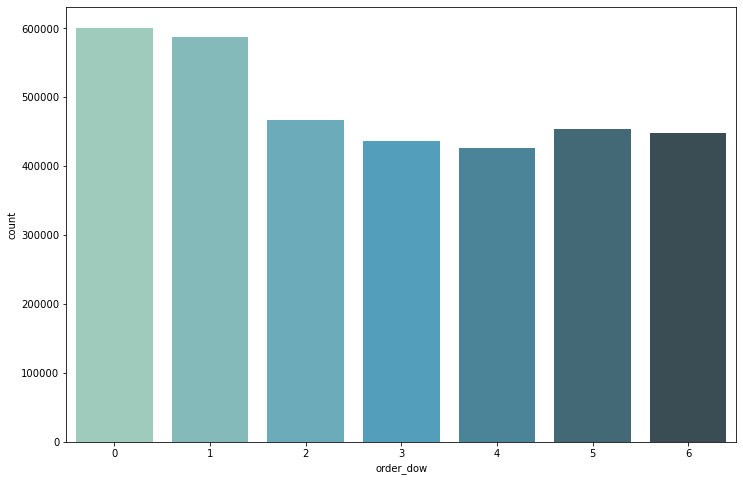

In [34]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_dow", data=orders,palette='GnBu_d')

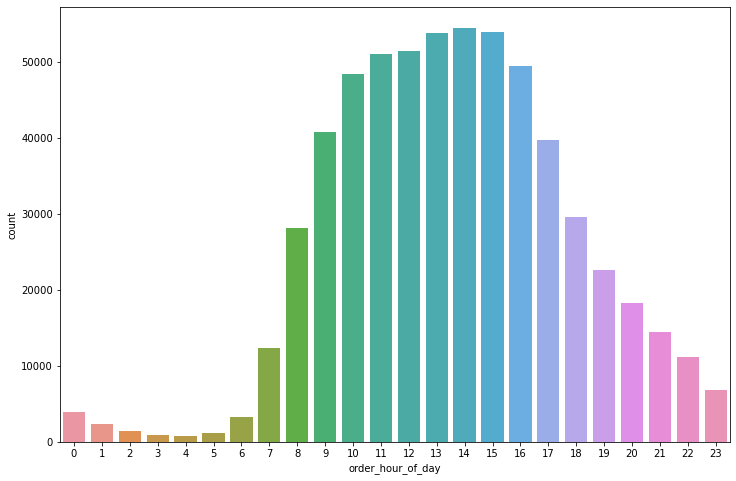

In [35]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==0])

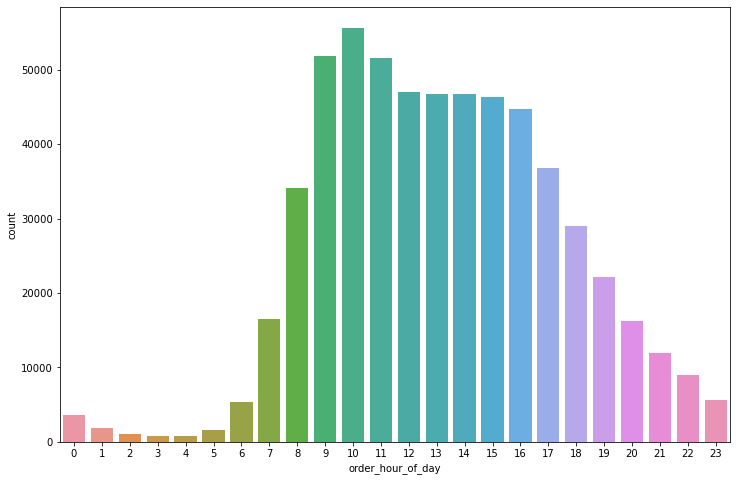

In [36]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==1])

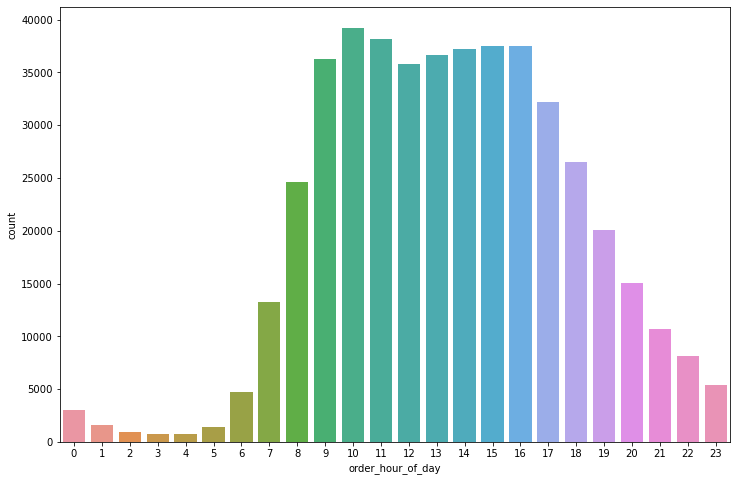

In [37]:

plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==2])

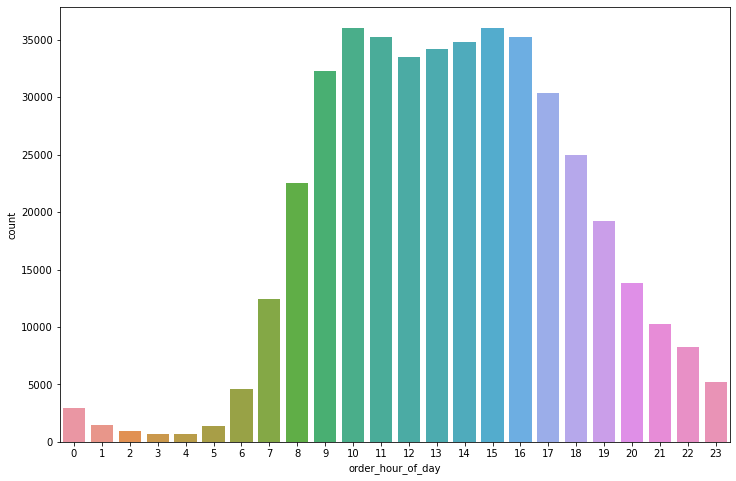

In [38]:
#wednesday
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==3])

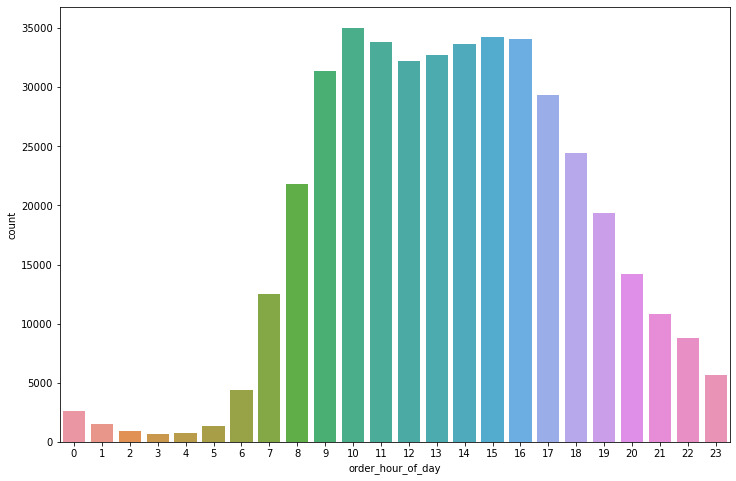

In [39]:
#thursday
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==4])


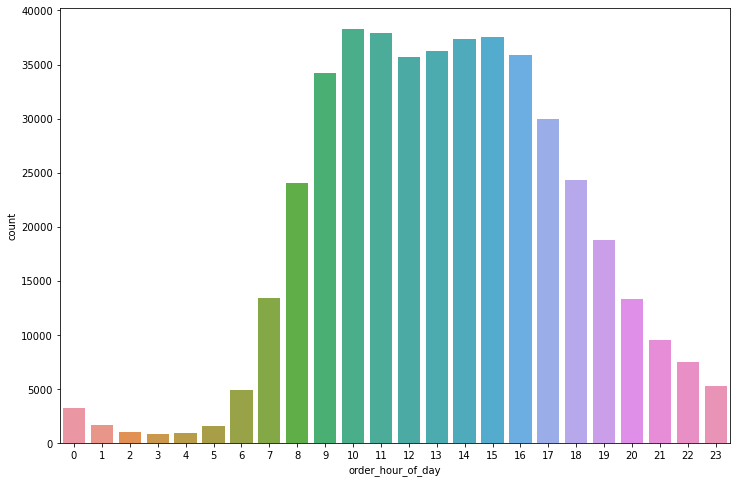

In [40]:

#friday
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==5])

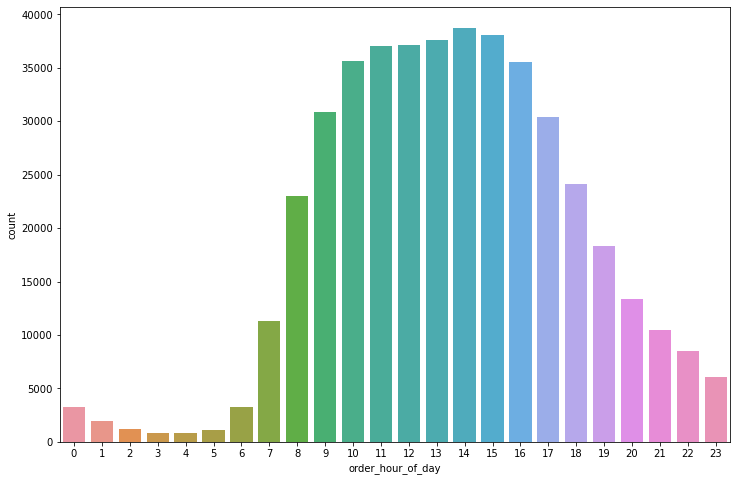

In [41]:
#saturday
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==6])

In [42]:
grouped_orders = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_orders

,order_dow,order_hour_of_day,order_number
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813
...,...,...,...
163,6,19,18346
164,6,20,13392
165,6,21,10501
166,6,22,8532


In [43]:
grouped_orders.head()


,order_dow,order_hour_of_day,order_number
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813


In [44]:
#pivoting the table for clarity
grouped_orders = grouped_orders.pivot('order_dow', 'order_hour_of_day', 'order_number')
grouped_orders

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


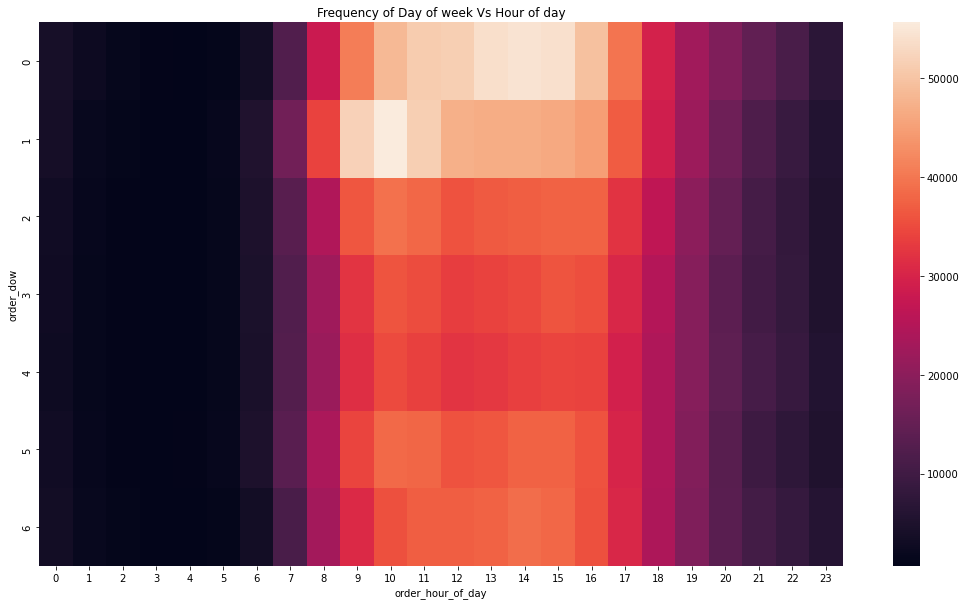

In [45]:
plt.figure(figsize=(18,10))
sns.heatmap(grouped_orders)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

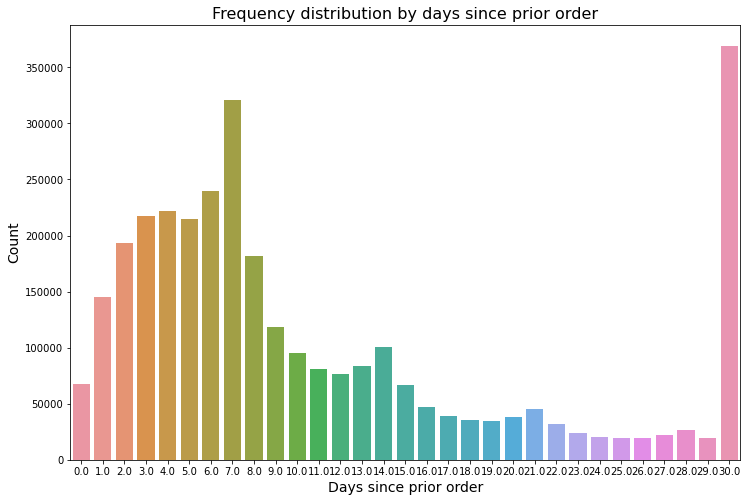

In [46]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Days since prior order', fontsize=14)
plt.title("Frequency distribution by days since prior order", fontsize=16)
plt.show()

In [47]:
# percentage of re-orders in orders_products_prior
order_products_prior.reordered.sum() / len(order_products_prior)

0.5896974667922161

In [49]:
 #percentage of re-orders in orders_products_train
order_products_train.reordered.sum() / len(order_products_train)

0.5985944127509629

In [51]:
#merging order_products_prior and products
op_prior_merged = pd.merge(order_products_prior, products, on='product_id', how='left')

In [52]:
#merging op_merged with aisles
op_prior_merged = pd.merge(op_prior_merged, aisles, on='aisle_id', how='left')

In [53]:

#merging the new op_prior_merged with departments
op_prior_merged= pd.merge(op_prior_merged, departments, on='department_id', how='left')

In [54]:
#let's see the new op_merged
op_prior_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [55]:
count_products = op_prior_merged['product_name'].value_counts().reset_index().head(20)
count_products.columns=['product_name','frequency']


In [56]:
count_products


,product_name,frequency
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


/Users/poojavaishnavipenmetsa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


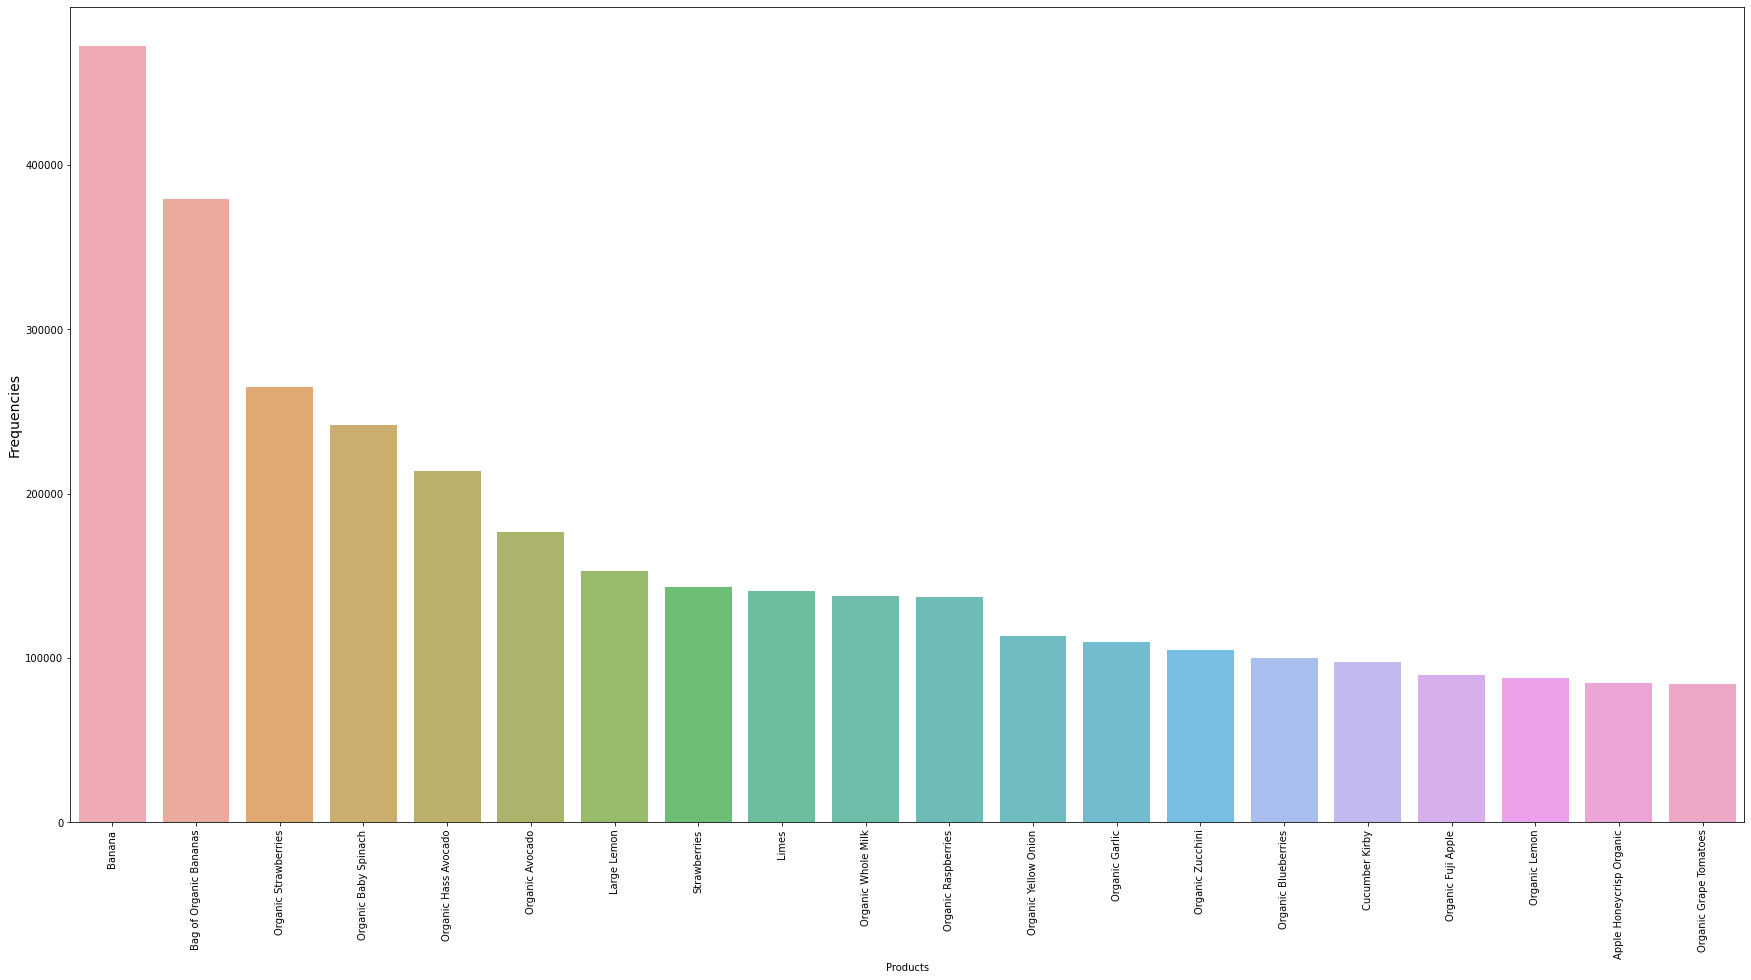

In [57]:
plt.figure(figsize=(30,15))
sns.barplot(count_products.product_name, count_products.frequency, alpha=0.8)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Products', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

In [58]:
count_aisles = op_prior_merged['aisle'].value_counts().head(20)
count_aisles

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
refrigerated                      575881
frozen produce                    522654
ice cream ice                     498425
crackers                          458838
energy granola bars               456386
eggs                              452134
lunch meat                        395130
frozen meals                      390299
baby food formula                 382456
fresh herbs                       377741
Name: aisle, dtype: int64

/Users/poojavaishnavipenmetsa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


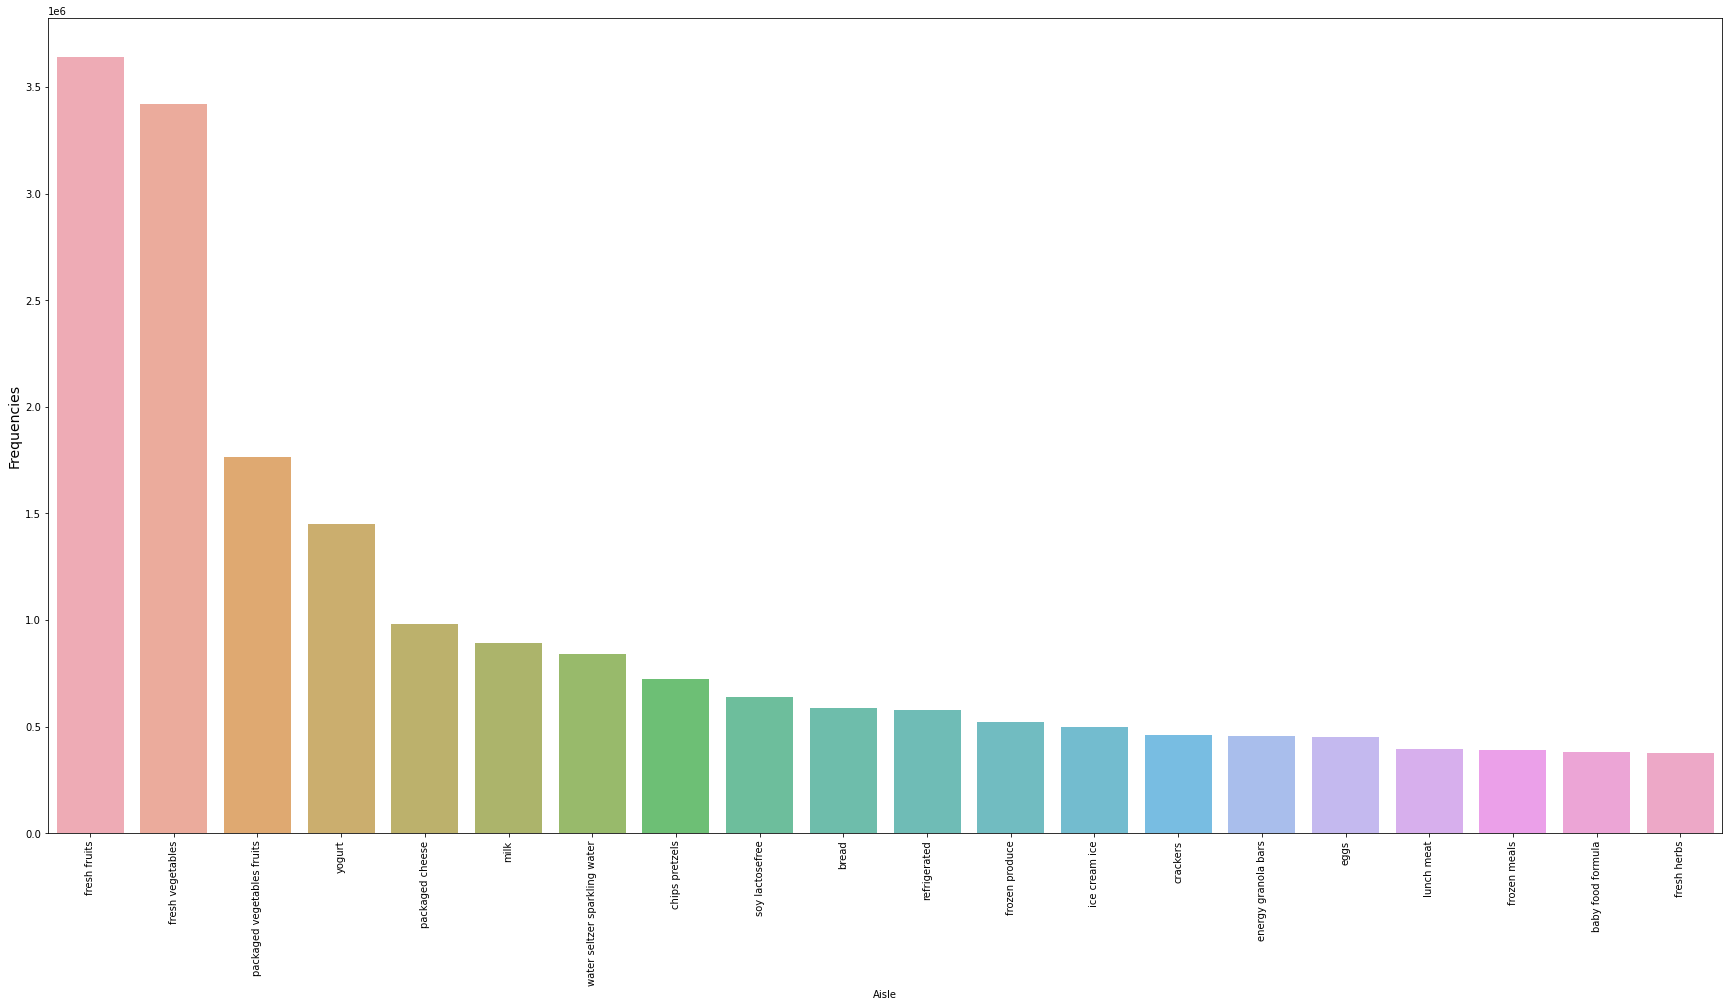

In [59]:
plt.figure(figsize=(30,15))
sns.barplot(count_aisles.index, count_aisles.values, alpha=0.8)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Aisle', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

In [60]:
count_dept = op_prior_merged['department'].value_counts()
count_dept

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

/Users/poojavaishnavipenmetsa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


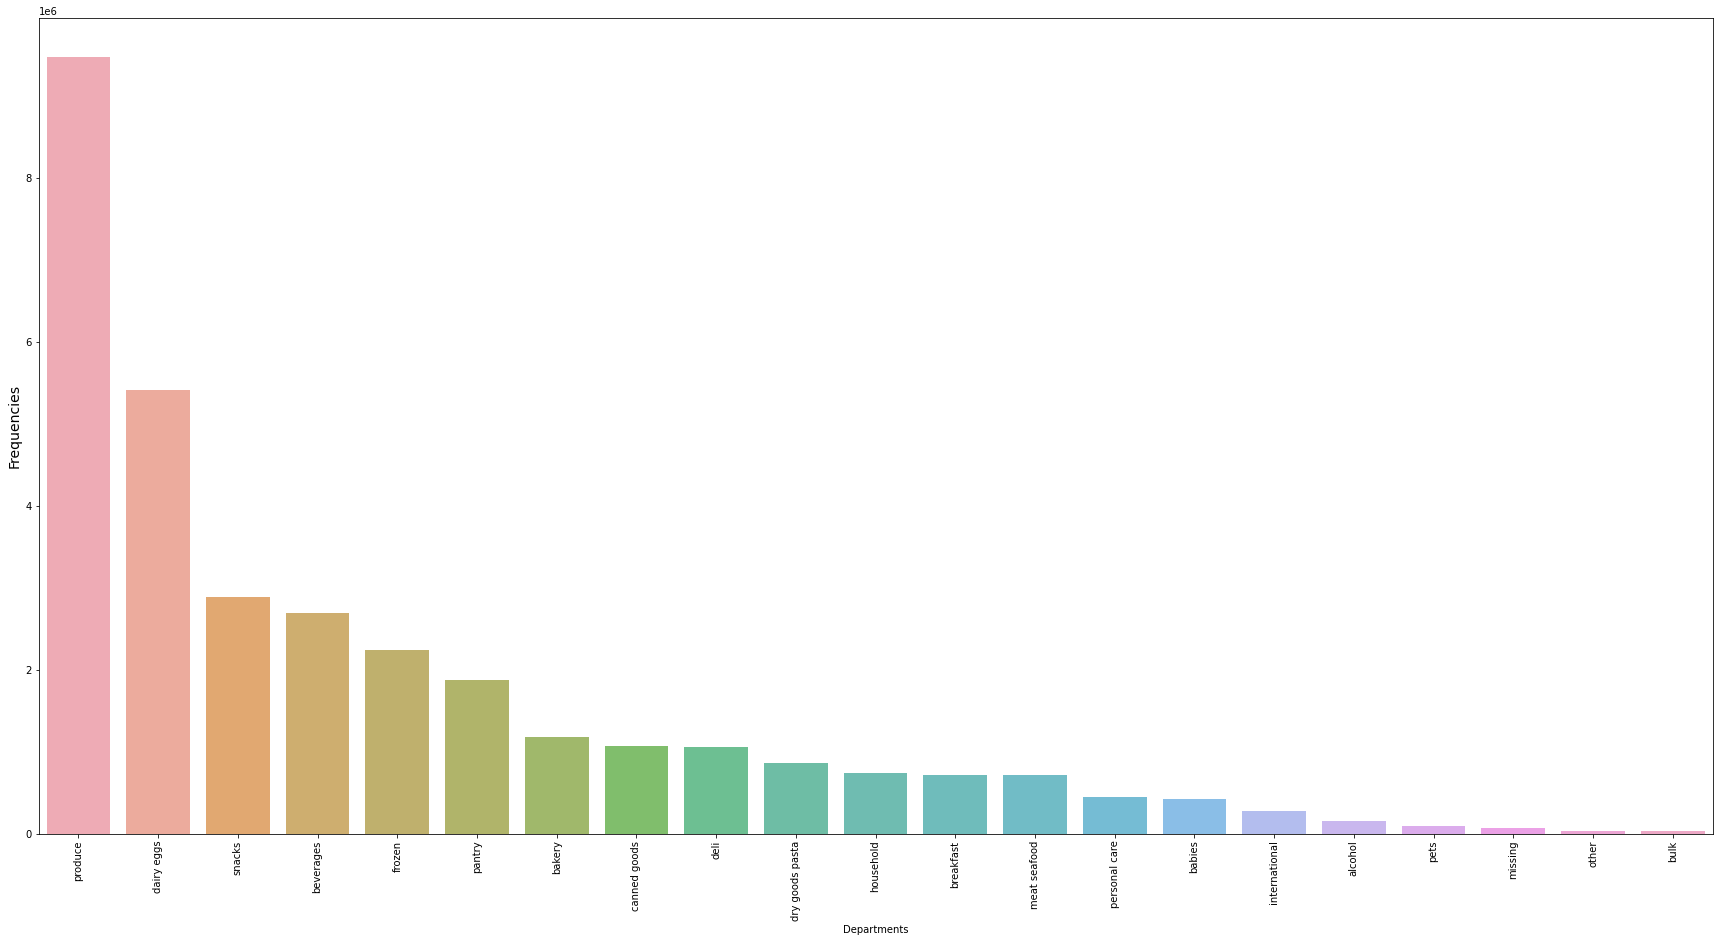

In [61]:
plt.figure(figsize=(30,15))
sns.barplot(count_dept.index, count_dept.values, alpha=0.8)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Departments', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

In [62]:
#merge order_product_prior with orders 
merged_reorders = pd.merge(order_products_prior, orders, on='order_id', how='left')
merged_reorders.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [63]:
count_reordered = merged_reorders['reordered'].value_counts()
count_reordered

1    19126536
0    13307953
Name: reordered, dtype: int64

/Users/poojavaishnavipenmetsa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


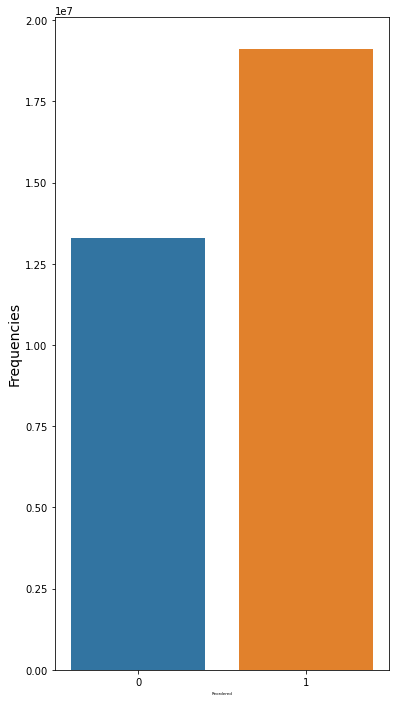

In [64]:
plt.figure(figsize=(6,12))
sns.barplot(count_reordered.index, count_reordered.values)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Reordered', fontsize=4)
plt.show()

In [65]:
#finding reorders against day of the week
grouped_reorders_dow = merged_reorders.groupby(["order_dow"])["reordered"].aggregate("count").reset_index()
grouped_reorders_dow

,order_dow,reordered
0,0,6209666
1,1,5665856
2,2,4217798
3,3,3844117
4,4,3787215
5,5,4209533
6,6,4500304


/Users/poojavaishnavipenmetsa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


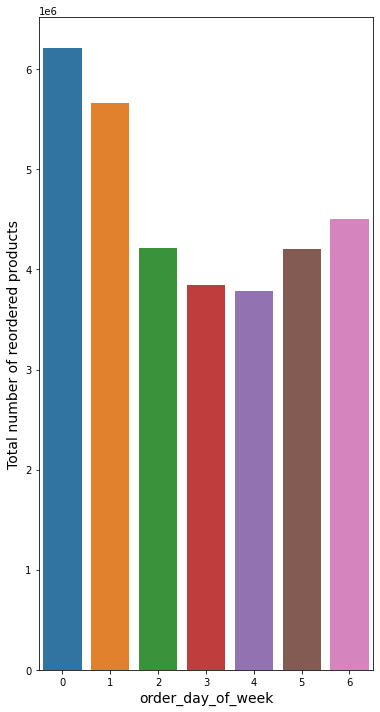

In [66]:
plt.figure(figsize=(6,12))
sns.barplot(grouped_reorders_dow.order_dow, grouped_reorders_dow.reordered)
plt.ylabel('Total number of reordered products', fontsize=14)
plt.xlabel('order_day_of_week', fontsize=14)
plt.show()

In [67]:
#finding reorders against hour of the day
grouped_reorders = merged_reorders.groupby(["order_hour_of_day"])["reordered"].aggregate("count").reset_index()
grouped_reorders

,order_hour_of_day,reordered
0,0,218948
1,1,115786
2,2,69434
3,3,51321
4,4,53283
5,5,88062
6,6,290795
7,7,891937
8,8,1719973
9,9,2456713


/Users/poojavaishnavipenmetsa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


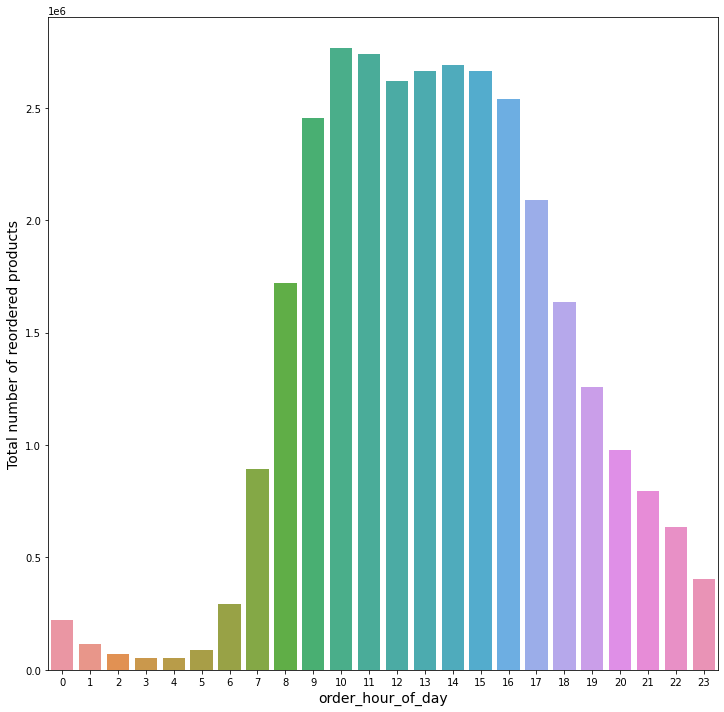

In [68]:
plt.figure(figsize=(12,12))
sns.barplot(grouped_reorders.order_hour_of_day, grouped_reorders.reordered)
plt.ylabel('Total number of reordered products', fontsize=14)
plt.xlabel('order_hour_of_day', fontsize=14)
plt.show()

In [69]:
from scipy import stats


In [70]:
from scipy.stats import norm


In [71]:
test_stats_hour_of_day, p_value_hour_of_day = stats.shapiro(orders.order_hour_of_day)
print("Test statistic for hour of the day is ",test_stats_hour_of_day)
print("P-value for hour of the day is",p_value_hour_of_day)

Test statistic for hour of the day is  1.0017759799957275
P-value for hour of the day is 1.0


/Users/poojavaishnavipenmetsa/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [72]:
test_stats_dow, p_value_dow =stats.shapiro(orders.order_dow)
print("Test statistic for day of the week ",test_stats_dow)
print("P-value for hour of the day is",p_value_dow)

Test statistic for day of the week  0.9015405774116516
P-value for hour of the day is 0.0


In [73]:
test_stats_days_since_prior, p_value_days_since_prior =stats.shapiro(orders.days_since_prior_order)
print("Test statistic for days_since_prior ",test_stats_days_since_prior)
print("P-value for days_since_prior",p_value_days_since_prior)

Test statistic for days_since_prior  nan
P-value for days_since_prior 1.0


In [74]:
stats.normaltest(orders.order_dow, axis=0)


NormaltestResult(statistic=12489959.480801087, pvalue=0.0)

In [75]:
stats.normaltest(orders_new.days_since_prior_order,axis = 0)


NormaltestResult(statistic=388756.6345651212, pvalue=0.0)

In [76]:
stats.normaltest(orders.order_hour_of_day,axis = 0)


NormaltestResult(statistic=3445.271523958157, pvalue=0.0)

In [77]:
stats.normaltest(orders.order_number,axis = 0)


NormaltestResult(statistic=1174327.5246865947, pvalue=0.0)

In [78]:
stats.normaltest(order_products_prior.reordered,axis = 0)


NormaltestResult(statistic=120794962.4161163, pvalue=0.0)

<AxesSubplot:>

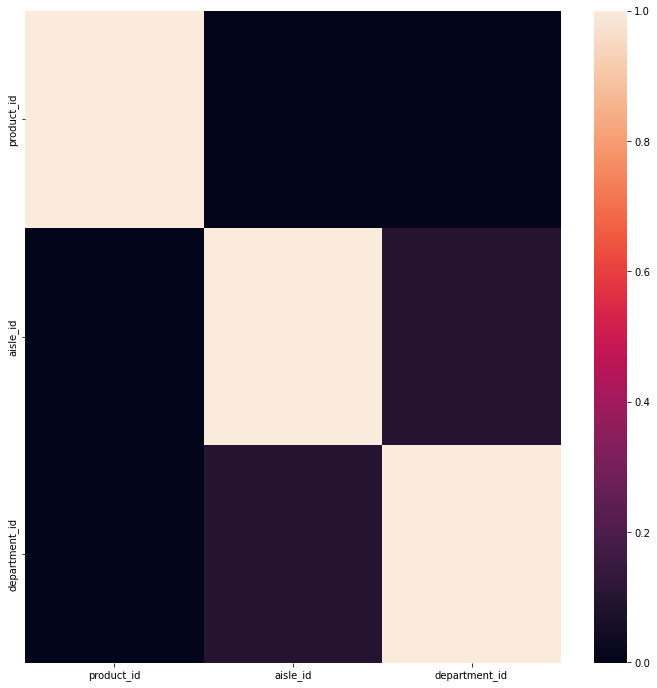

In [79]:
plt.figure(figsize=(12,12))
corr_products = products.corr()
sns.heatmap(corr_products, 
            xticklabels=corr_products.columns.values,
            yticklabels=corr_products.columns.values)

In [80]:
anderson_results_dow = stats.anderson(orders.order_dow)
print(anderson_results_dow)

AndersonResult(statistic=96109.64465634013, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [81]:
anderson_hour_of_day = stats.anderson(orders.order_hour_of_day)
print(anderson_hour_of_day)

AndersonResult(statistic=13760.749163327739, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [82]:
anderson_order_number = stats.anderson(orders.order_number)
print(anderson_order_number)

AndersonResult(statistic=205110.41252531623, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [83]:
anderson_days_since_prior_order = stats.anderson(orders_new.days_since_prior_order)
print(anderson_days_since_prior_order)

AndersonResult(statistic=179401.97682766616, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [84]:
anderson_reordered = stats.anderson(order_products_prior.reordered)
print(anderson_reordered)

AndersonResult(statistic=6077565.16853606, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [85]:
anderson_reordered = stats.anderson(order_products_prior.reordered)
print(anderson_reordered)

AndersonResult(statistic=6077565.16853606, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


<AxesSubplot:>

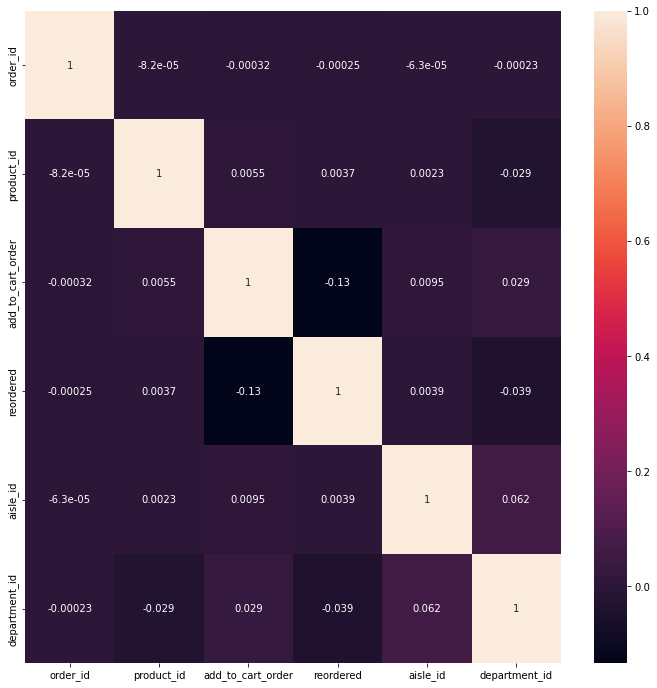

In [86]:
plt.figure(figsize=(12,12))
corr_op = op_prior_merged.corr()
sns.heatmap(corr_op, 
            xticklabels=corr_op.columns.values,
            yticklabels=corr_op.columns.values, annot=True)

<AxesSubplot:>

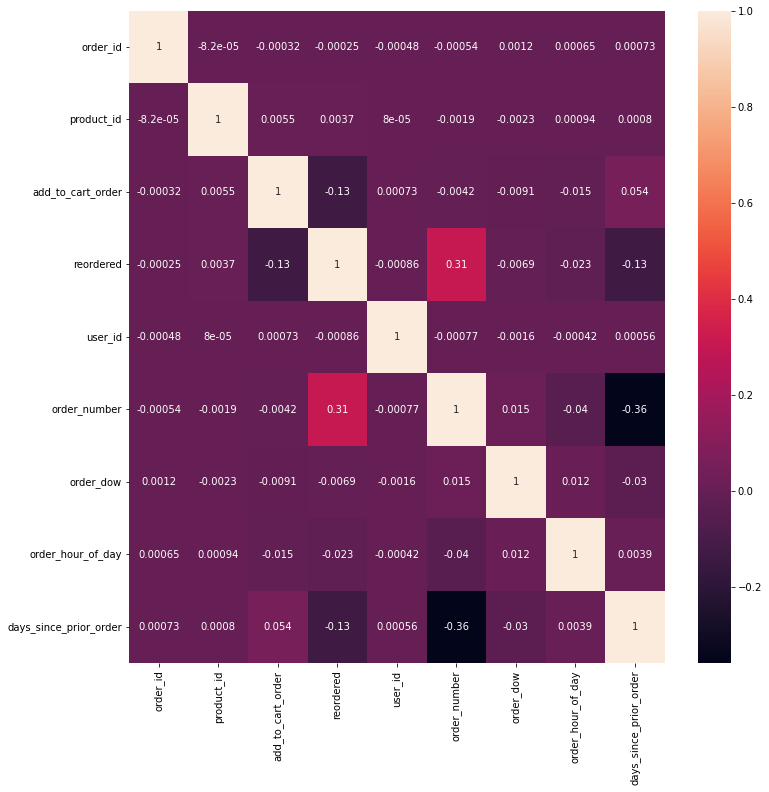

In [87]:
plt.figure(figsize=(12,12))
corr_reorders = merged_reorders.corr()
sns.heatmap(corr_reorders, 
            xticklabels=corr_reorders.columns.values,
            yticklabels=corr_reorders.columns.values, annot=True)

In [88]:
ks_result_dow = stats.kstest(orders.order_dow, cdf='norm')
ks_result_dow

KstestResult(statistic=0.6656971514325754, pvalue=0.0)

In [89]:
ks_order_hour_of_day = stats.kstest(orders.order_hour_of_day, cdf='norm')
ks_order_hour_of_day

KstestResult(statistic=0.9861701358289924, pvalue=0.0)

In [90]:
ks_order_number= stats.kstest(orders.order_number, cdf='norm')
ks_order_number

KstestResult(statistic=0.9169739261936432, pvalue=0.0)

In [91]:
ks_days_since_prior_order = stats.kstest(orders_new.days_since_prior_order, cdf='norm')
ks_days_since_prior_order

KstestResult(statistic=0.9109947053300469, pvalue=0.0)

In [92]:
ks_reordered = stats.kstest(order_products_prior.reordered, cdf='norm')
ks_reordered

KstestResult(statistic=0.5, pvalue=0.0)

In [93]:
merged1 = pd.merge(order_products_train, orders, on='order_id', how='left')
merged1.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


In [94]:
df_merged1 = pd.merge(merged1, products, on='product_id', how='left')
df_merged1.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15


In [95]:
#merging all the datasets to get a final train dataset
df = pd.merge(df_merged1, departments, on='department_id', how='left')
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods


In [96]:
df_new = df.copy()
df_new.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods


In [97]:
del df['eval_set']


In [98]:
del df['add_to_cart_order']


In [99]:
df.head()


,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods


In [100]:
#Getting average days between orders as a feature by using days_since_prior_order
df['average_days_between_orders'] = orders_new.groupby('user_id')['days_since_prior_order'].mean().astype(np.float32)
df['average_days_between_orders'] = df['average_days_between_orders'].replace(np.nan, 0)


In [101]:
df['average_days_between_orders'] = df['average_days_between_orders'].replace(0, 1)


In [102]:
#number of orders as a feature using the orders_new dataset
df['nb_orders'] = orders_new.groupby('user_id').size().astype(np.int16)
df['nb_orders'] = df['nb_orders'].replace(np.nan, 0)

In [103]:
df.head()


,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,average_days_between_orders,nb_orders
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285715,14.0
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0


In [104]:
#Getting the total items using the entire dataset 
df['total_items'] = df_merged1.groupby('user_id').size().astype(np.int16)
df['total_items'] = df['total_items'].replace(np.nan, 0)

In [105]:
df.head()


,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,average_days_between_orders,nb_orders,total_items
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0,0.0
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0,11.0
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285715,14.0,31.0
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0,0.0
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0,0.0


In [106]:
#getting average basket as afeature by using total items and number of orders
df['average_basket'] = (df.total_items /df.nb_orders).astype(np.float32)
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,average_days_between_orders,nb_orders,total_items,average_basket
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0,0.0,NaN
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0,11.0,1.100000
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285715,14.0,31.0,2.214286
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0,0.0,0.000000
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0,0.0,0.000000


In [107]:
df['average_basket'] = df['average_basket'].replace(np.nan, 0)


In [108]:
# creating a days_since_ratio using days_since_prior_order and average_days_between_orders
df['days_since_ratio'] = df.days_since_prior_order / df.average_days_between_orders

In [109]:
df.head()


,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0,0.0,0.000000,9.000000
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0,11.0,1.100000,0.473684
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285715,14.0,31.0,2.214286,0.552632
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0,0.0,0.000000,0.750000
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0,0.0,0.000000,0.529412


In [110]:
del df['user_id']

In [111]:
del df['product_name']

In [112]:
del df['department']

In [113]:
df.head()

,order_id,product_id,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio
0,1,49302,1,4,4,10,9.0,120,16,1.000000,0.0,0.0,0.000000,9.000000
1,1,11109,1,4,4,10,9.0,108,16,19.000000,10.0,11.0,1.100000,0.473684
2,1,10246,0,4,4,10,9.0,83,4,16.285715,14.0,31.0,2.214286,0.552632
3,1,49683,0,4,4,10,9.0,83,4,12.000000,12.0,0.0,0.000000,0.750000
4,1,43633,1,4,4,10,9.0,95,15,17.000000,5.0,0.0,0.000000,0.529412


In [114]:
hour = {c:i for i,c in enumerate(df['order_hour_of_day'].unique())}


In [115]:
aisle = {c:i for i,c in enumerate(df['aisle_id'].unique())}
dept = {c:i for i,c in enumerate(df['department_id'].unique())}
product = {c:i for i,c in enumerate(df['product_id'].unique())}

In [116]:
df['aisle_new'] = [float(aisle[t]) for t in df.aisle_id]


In [117]:
df['dept_new'] = [float(dept[t]) for t in df.department_id]


In [118]:
df['product_new'] = [float(product[t]) for t in df.product_id]


In [119]:
df['order_hour_of_day_new'] = [float(hour[t]) for t in df.order_hour_of_day]


In [120]:
df['order_hour_of_day_new'].value_counts()


5.0     119370
11.0    116198
6.0     114762
15.0    114119
8.0     111752
0.0     110479
2.0     110237
9.0      96944
10.0     93856
1.0      76522
4.0      67386
13.0     58175
3.0      40920
12.0     36302
7.0      34813
16.0     27319
17.0     16965
14.0     11847
18.0      9083
20.0      5626
22.0      3847
21.0      3226
23.0      2438
19.0      2431
Name: order_hour_of_day_new, dtype: int64

In [121]:
dow = {c:i for i,c in enumerate(df['order_dow'].unique())}


In [122]:
df['order_dow_new'] = [float(dow[t]) for t in df.order_dow]


In [123]:
dspo = {c:i for i,c in enumerate(df['days_since_prior_order'].unique())}


In [124]:
df['days_since_prior_order__new'] = [float(dspo[t]) for t in df.days_since_prior_order]


In [125]:
df['reordered'] = df['reordered'].astype('float')


In [126]:
df.head()


,order_id,product_id,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio,aisle_new,dept_new,product_new,order_hour_of_day_new,order_dow_new,days_since_prior_order__new
0,1,49302,1.0,4,4,10,9.0,120,16,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,11109,1.0,4,4,10,9.0,108,16,19.000000,10.0,11.0,1.100000,0.473684,1.0,0.0,1.0,0.0,0.0,0.0
2,1,10246,0.0,4,4,10,9.0,83,4,16.285715,14.0,31.0,2.214286,0.552632,2.0,1.0,2.0,0.0,0.0,0.0
3,1,49683,0.0,4,4,10,9.0,83,4,12.000000,12.0,0.0,0.000000,0.750000,2.0,1.0,3.0,0.0,0.0,0.0
4,1,43633,1.0,4,4,10,9.0,95,15,17.000000,5.0,0.0,0.000000,0.529412,3.0,2.0,4.0,0.0,0.0,0.0


In [127]:
del df['aisle_id']


In [128]:
del df['department_id']


In [129]:
df.head()

,order_id,product_id,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio,aisle_new,dept_new,product_new,order_hour_of_day_new,order_dow_new,days_since_prior_order__new
0,1,49302,1.0,4,4,10,9.0,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,11109,1.0,4,4,10,9.0,19.000000,10.0,11.0,1.100000,0.473684,1.0,0.0,1.0,0.0,0.0,0.0
2,1,10246,0.0,4,4,10,9.0,16.285715,14.0,31.0,2.214286,0.552632,2.0,1.0,2.0,0.0,0.0,0.0
3,1,49683,0.0,4,4,10,9.0,12.000000,12.0,0.0,0.000000,0.750000,2.0,1.0,3.0,0.0,0.0,0.0
4,1,43633,1.0,4,4,10,9.0,17.000000,5.0,0.0,0.000000,0.529412,3.0,2.0,4.0,0.0,0.0,0.0


In [130]:
del df['order_hour_of_day']
del df['order_dow']
del df['days_since_prior_order']
del df['product_id']

In [131]:
df.head()


,order_id,reordered,order_number,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio,aisle_new,dept_new,product_new,order_hour_of_day_new,order_dow_new,days_since_prior_order__new
0,1,1.0,4,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,4,19.000000,10.0,11.0,1.100000,0.473684,1.0,0.0,1.0,0.0,0.0,0.0
2,1,0.0,4,16.285715,14.0,31.0,2.214286,0.552632,2.0,1.0,2.0,0.0,0.0,0.0
3,1,0.0,4,12.000000,12.0,0.0,0.000000,0.750000,2.0,1.0,3.0,0.0,0.0,0.0
4,1,1.0,4,17.000000,5.0,0.0,0.000000,0.529412,3.0,2.0,4.0,0.0,0.0,0.0


In [132]:
#Variable to be predicted
y=df['reordered']

In [133]:
del df['reordered']


In [134]:
#final df which will be used to run our algorithms
df.head()


,order_id,order_number,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio,aisle_new,dept_new,product_new,order_hour_of_day_new,order_dow_new,days_since_prior_order__new
0,1,4,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4,19.000000,10.0,11.0,1.100000,0.473684,1.0,0.0,1.0,0.0,0.0,0.0
2,1,4,16.285715,14.0,31.0,2.214286,0.552632,2.0,1.0,2.0,0.0,0.0,0.0
3,1,4,12.000000,12.0,0.0,0.000000,0.750000,2.0,1.0,3.0,0.0,0.0,0.0
4,1,4,17.000000,5.0,0.0,0.000000,0.529412,3.0,2.0,4.0,0.0,0.0,0.0


In [135]:
from sklearn.model_selection import train_test_split


In [136]:
Xtr, Xtest, ytr, ytest = train_test_split(df, y, test_size=0.30, random_state=5)


In [137]:
Xtr.shape


(969231, 13)

In [138]:
ytr=ytr.ravel()


In [139]:
ytest=ytest.ravel()


In [140]:
from sklearn.linear_model import LogisticRegression


In [141]:
from sklearn.metrics import log_loss


In [142]:
from sklearn.metrics import accuracy_score


In [143]:
#Logistic Regression model
clf=(LogisticRegression(C=0.02))

In [144]:
#fitting the model
clf.fit(Xtr, ytr)

LogisticRegression(C=0.02)

In [145]:
#predictions
pred=clf.predict(Xtest)

In [146]:
pred


array([1., 1., 1., ..., 1., 0., 1.])

In [147]:
#accuracy score of Logistic Regression Model
print(accuracy_score(clf.predict(Xtest), ytest))

0.59711930589861


In [148]:
from sklearn.ensemble import RandomForestClassifier


In [149]:
#Random Forest model
clfrf = RandomForestClassifier(max_features="log2", max_depth=11, n_estimators=24,min_samples_split=1000, 
                               oob_score=True)

In [150]:
#fitting
clfrf.fit(Xtr, ytr)

/Users/poojavaishnavipenmetsa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=11, max_features='log2',
                       min_samples_split=1000, n_estimators=24, oob_score=True)

In [151]:
#predictions
predrf=clfrf.predict(Xtest)

In [152]:
#accuracy score for the random forest model
accuracy_score(predrf, ytest)

0.6651307458604767

In [154]:
plt.figure(figsize=(12,8))
feature_imp_reordered = pd.Series(clfrf.feature_importances_,index= df.columns)


<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

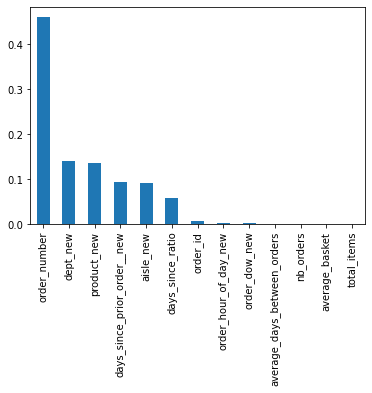

In [156]:
feature_imp_reordered.sort_values(ascending=False).plot(kind='bar')

In [157]:
from sklearn.ensemble import AdaBoostClassifier


In [158]:
#AdaBoost Classifier
clfa = AdaBoostClassifier( n_estimators=24,random_state=True)

In [159]:
#fitting
clfa.fit(Xtr, ytr)

AdaBoostClassifier(n_estimators=24, random_state=True)

In [160]:
#predictions
preda = clfa.predict(Xtest)

In [161]:
#Accuracy Score for AdaBoost Classifier
accuracy_score(preda, ytest)

0.6565339226647022

In [162]:
from sklearn.ensemble import GradientBoostingClassifier


In [167]:
#Gradient Boosting Classifier
clfg= GradientBoostingClassifier(max_features="log2", max_depth=11, n_estimators=24,min_samples_split=1000)

In [168]:
#fitting
clfg.fit(Xtr, ytr)

GradientBoostingClassifier(max_depth=11, max_features='log2',
                           min_samples_split=1000, n_estimators=24)

In [169]:
#predictions
predg = clfg.predict(Xtest)

In [170]:
#accuracy score for Gradient Boosting Classifier
accuracy_score(predg, ytest)

0.6710120225525175

In [174]:
# for predicting the department variable
df_new.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods


In [176]:
# creating new features such as orders,reorders and reorder_rate for predicting the department variable

df_new['orders'] = df_new.groupby(df_new.product_id).size().astype(np.int32) 
df_new['orders'] = df_new['orders'].replace(np.nan,0)
df_new['reorders'] = df_new['reordered'].groupby(df_new.product_id).sum().astype(np.float32)
df_new['reorders'] = df_new['reorders'].replace(np.nan,0)
df_new['reorder_rate'] = (df_new.reorders / df_new.orders).astype(np.float32)
df_new['reorder_rate'] = df_new['reorder_rate'].replace(np.nan,0)

In [177]:
df_new.head()


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,orders,reorders,reorder_rate
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,0.0,0.0,0.000000
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,76.0,49.0,0.644737
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,produce,4.0,1.0,0.250000
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,produce,6.0,6.0,1.000000
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,22.0,14.0,0.636364


In [178]:
df_new['average_days_between_orders'] = orders_new.groupby('user_id')['days_since_prior_order'].mean().astype(np.float32)
df_new['average_days_between_orders'] = df_new['average_days_between_orders'].replace(np.nan, 0)

In [179]:
df_new['average_days_between_orders'] = df_new['average_days_between_orders'].replace(0, 1)


In [180]:
df_new['nb_orders'] = orders_new.groupby('user_id').size().astype(np.int16)
df_new['nb_orders'] = df_new['nb_orders'].replace(np.nan, 0)

In [181]:
df_new['total_items'] = df_merged1.groupby('user_id').size().astype(np.int16)
df_new['total_items'] = df_new['total_items'].replace(np.nan, 0)

In [182]:
df_new['average_basket'] = (df_new.total_items /df_new.nb_orders).astype(np.float32)


In [183]:
df_new.head()


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,...,aisle_id,department_id,department,orders,reorders,reorder_rate,average_days_between_orders,nb_orders,total_items,average_basket
0,1,49302,1,1,112108,train,4,4,10,9.0,...,120,16,dairy eggs,0.0,0.0,0.000000,1.000000,0.0,0.0,NaN
1,1,11109,2,1,112108,train,4,4,10,9.0,...,108,16,dairy eggs,76.0,49.0,0.644737,19.000000,10.0,11.0,1.100000
2,1,10246,3,0,112108,train,4,4,10,9.0,...,83,4,produce,4.0,1.0,0.250000,16.285715,14.0,31.0,2.214286
3,1,49683,4,0,112108,train,4,4,10,9.0,...,83,4,produce,6.0,6.0,1.000000,12.000000,12.0,0.0,0.000000
4,1,43633,5,1,112108,train,4,4,10,9.0,...,95,15,canned goods,22.0,14.0,0.636364,17.000000,5.0,0.0,0.000000


In [184]:
df_new['average_basket'] = df_new['average_basket'].replace(np.nan, 0)


In [185]:
df_new['days_since_ratio'] = df_new.days_since_prior_order / df_new.average_days_between_orders


In [186]:
df_new['order_hour_of_day_new'] = [float(hour[t]) for t in df_new.order_hour_of_day]


In [187]:
df_new['reordered'] = df_new['reordered'].astype('float')


In [188]:
df_new['order_dow_new'] = [float(dow[t]) for t in df_new.order_dow]


In [189]:
df_new['days_since_prior_order__new'] = [float(dspo[t]) for t in df_new.days_since_prior_order]


In [190]:
df_new['dept_new'] = [float(dept[t]) for t in df_new.department_id]


In [191]:
df_new['product_new'] = [float(product[t]) for t in df_new.product_id]


In [192]:
del df_new['days_since_prior_order']
del df_new['order_dow']
del df_new['order_hour_of_day']
del df_new['department_id']
del df_new['aisle_id']
del df_new['product_id']
#del df_new['user_id']
del df_new['add_to_cart_order']
del df_new['eval_set']
del df_new['department']
del df_new['product_name']
del df_new['product_new']

In [193]:
#final df which will be used to run our model to predict the category of department
df_new.head()

,order_id,reordered,user_id,order_number,orders,reorders,reorder_rate,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio,order_hour_of_day_new,order_dow_new,days_since_prior_order__new,dept_new
0,1,1.0,112108,4,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.0,0.0
1,1,1.0,112108,4,76.0,49.0,0.644737,19.000000,10.0,11.0,1.100000,0.473684,0.0,0.0,0.0,0.0
2,1,0.0,112108,4,4.0,1.0,0.250000,16.285715,14.0,31.0,2.214286,0.552632,0.0,0.0,0.0,1.0
3,1,0.0,112108,4,6.0,6.0,1.000000,12.000000,12.0,0.0,0.000000,0.750000,0.0,0.0,0.0,1.0
4,1,1.0,112108,4,22.0,14.0,0.636364,17.000000,5.0,0.0,0.000000,0.529412,0.0,0.0,0.0,2.0


In [194]:
# our variable to be predicted
ynew = df_new['dept_new']

In [195]:
del df_new['dept_new']

In [196]:
Xtrnew, Xtestnew, ytrnew, ytestnew = train_test_split(df_new, ynew, test_size=0.30, random_state=5)


In [197]:
#Random Forest classifier
clfrfnew = RandomForestClassifier(max_features="log2", max_depth=11, n_estimators=24,min_samples_split=1000, 
                               oob_score=True)

In [198]:
#fitting
clfrfnew.fit(Xtrnew, ytrnew)

/Users/poojavaishnavipenmetsa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=11, max_features='log2',
                       min_samples_split=1000, n_estimators=24, oob_score=True)

In [199]:
#predictions and probabilities
predrfnewp =clfrfnew.predict_proba(Xtestnew)

<AxesSubplot:>

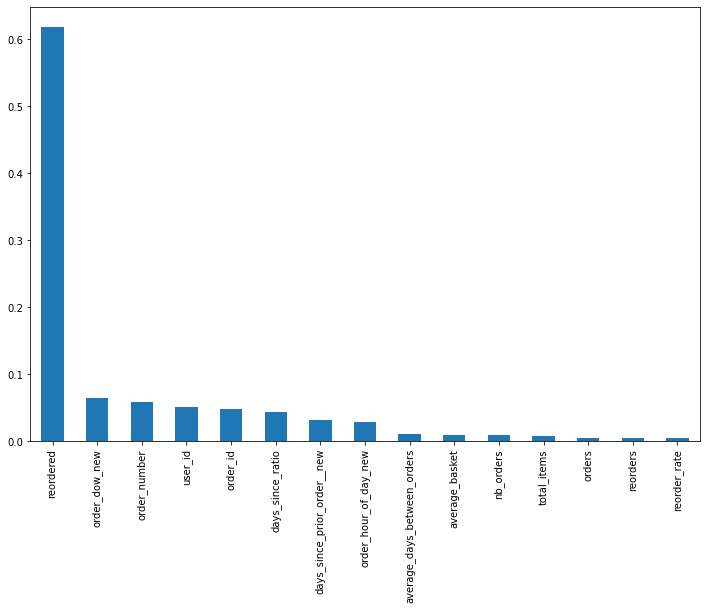

In [201]:
plt.figure(figsize=(12,8))
feature_imp_dept = pd.Series(clfrfnew.feature_importances_,index= df_new.columns)
feature_imp_dept.sort_values(ascending=False).plot(kind='bar')

In [202]:
# Log loss for the Random Forest model
log_loss( ytestnew,predrfnewp)

2.3429011136565405

In [203]:

#Gradient Boosting Classifier
clfgb= GradientBoostingClassifier(max_features="log2", max_depth=11, n_estimators=24,min_samples_split=1000)


In [204]:
#fitting
clfgb.fit(Xtrnew,ytrnew)

GradientBoostingClassifier(max_depth=11, max_features='log2',
                           min_samples_split=1000, n_estimators=24)

In [207]:
#predictions and probabilties
predgbnewp =clfgb.predict_proba(Xtestnew)

In [206]:
#Log loss score for Gradient Boosting Classifier
log_loss( ytestnew,predgbnewp)

2.3416179854180434

In [208]:
#AdaBoost Classifier
clfada = AdaBoostClassifier( n_estimators=24,random_state=True)

In [209]:
#fitting
clfada.fit(Xtrnew, ytrnew)

AdaBoostClassifier(n_estimators=24, random_state=True)

In [210]:
#predictions and probabilities
predadap = clfada.predict_proba(Xtestnew)

In [211]:
#Log loss score for AdaBoost Classifier
log_loss( ytestnew,predadap)

2.979625315097